In [44]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle

In [45]:
def get_directories(path):
    # Get list of all files and directories in the given path
    contents = os.listdir(path)
    
    # Filter out only directories
    directories = [content for content in contents if os.path.isdir(os.path.join(path, content))]
    
    return directories

In [46]:
# print(directory_list)
# make sure to stick with rgb images
# make sure wwhen training the model, the pixel intensity is from 0 to 1 (normalize the images) (make it 0 mean)

In [47]:
# create histogram of data distribution per class (both training and testing)
def create_data_hist(samples):
    # samples = [(class_name, count), ...]
    class_names = [item[0] for item in samples]
    num_samples = [item[1] for item in samples]
    
    for i, name in enumerate(class_names):
        print(name, num_samples[i])
    
    # Plot histogram
    plt.bar(class_names, num_samples, color='skyblue')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Samples')
    plt.title('Data Distribution Histogram')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [48]:
# Processing our dataset
# dataset_type = {'train', 'val'}
def create_dataset(dataset_type):
    directory_list = get_directories(f'./{dataset_type}')
    data = []
    CATEGORIES = directory_list
    DATADIR = f'./{dataset_type}/'
    samples = []

    for category in CATEGORIES:
        count = 0
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_arr = np.moveaxis(img_array, -1, 0)
                data.append((new_arr, class_num))
                count += 1
            except Exception as e:
                pass
        samples.append((category, count))

    # If the class is 'Tomato___healthy', keep 1000 instances, else keep 400 instances
    balanced_data = []
    for category, count in samples:
        if category == 'Tomato___healthy':
            balanced_data.extend(data[:1000])  # Keep the first 1000 instances
            data = data[1000:]  # Remove the first 1000 instances from data
        else:
            balanced_data.extend(data[:400])  # Keep the first 400 instances
            data = data[400:]  # Remove the first 400 instances from data

    create_data_hist(samples)  # Display original data distribution
    create_data_hist([('Tomato___healthy', 1000)] + [('Anomaly', 400) for _ in range(len(CATEGORIES)-1)])  # Display balanced data distribution
    
    # Shuffle the balanced data
    random.shuffle(balanced_data)

    return balanced_data


In [49]:
def save_data(data, name):
    # Dumping training data
    out = name + ".pickle"
    pickle_out = open(out, "wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()

Tomato___Bacterial_spot 1000
Tomato___Early_blight 1000
Tomato___healthy 1000
Tomato___Late_blight 1000
Tomato___Leaf_Mold 1000
Tomato___Septoria_leaf_spot 1000
Tomato___Spider_mites Two-spotted_spider_mite 1000
Tomato___Target_Spot 1000
Tomato___Tomato_mosaic_virus 1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus 1000


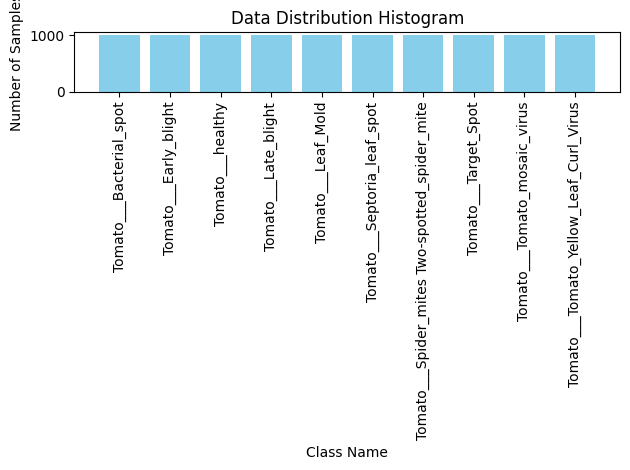

Tomato___healthy 1000
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400


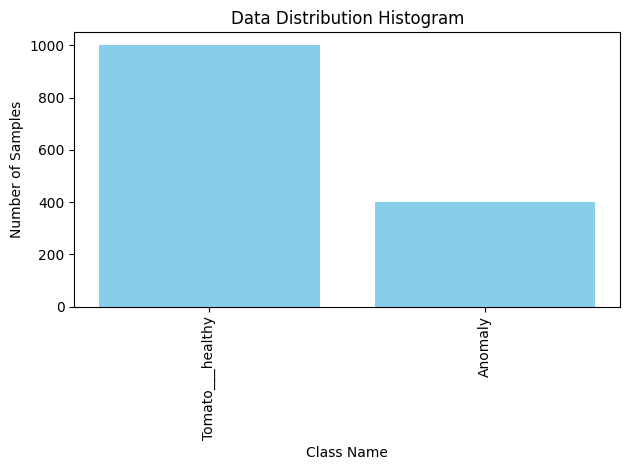

In [50]:
train_data = create_dataset('train')

In [51]:
train_data[0][0].shape

(3, 256, 256)

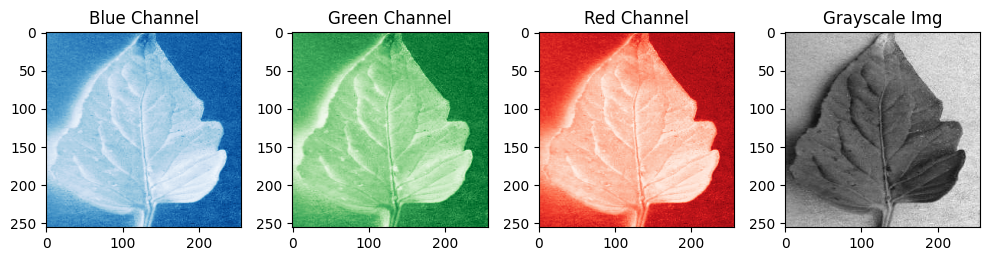

In [52]:
# plotting images
image = train_data[100][0]
blue_channel, green_channel, red_channel = [image[0], image[1], image[2]]

# grayscale image
new_img = np.moveaxis(image, 0, -1)
gray_image = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)


# Plot each channel separately
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
# plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Img')
# plt.axis('off')

plt.tight_layout()
plt.show()


Tomato___Bacterial_spot 100
Tomato___Early_blight 100
Tomato___healthy 100
Tomato___Late_blight 100
Tomato___Leaf_Mold 100
Tomato___Septoria_leaf_spot 100
Tomato___Spider_mites Two-spotted_spider_mite 100
Tomato___Target_Spot 100
Tomato___Tomato_mosaic_virus 100
Tomato___Tomato_Yellow_Leaf_Curl_Virus 100


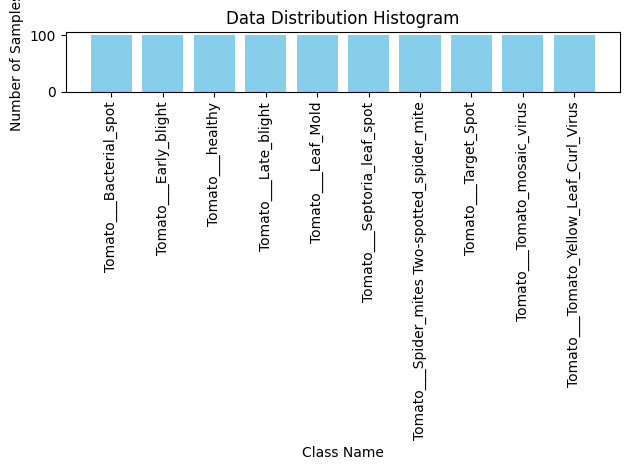

Tomato___healthy 1000
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400
Anomaly 400


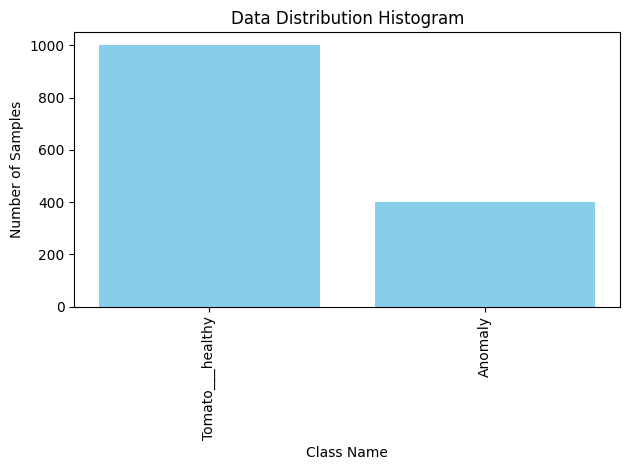

In [53]:
test_data = create_dataset('val')

In [54]:
save_data(train_data, "train_data")
save_data(test_data, "val_data")